<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Intro-to-Pandas" data-toc-modified-id="Intro-to-Pandas-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Intro to Pandas</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#1.-Importing-Pandas" data-toc-modified-id="1.-Importing-Pandas-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>1. Importing Pandas</a></span></li><li><span><a href="#2.-Creating-A-Dataframe-and-Basic-Exploration" data-toc-modified-id="2.-Creating-A-Dataframe-and-Basic-Exploration-1.0.2"><span class="toc-item-num">1.0.2&nbsp;&nbsp;</span>2. Creating A Dataframe and Basic Exploration</a></span></li><li><span><a href="#3.-Selecting-Data" data-toc-modified-id="3.-Selecting-Data-1.0.3"><span class="toc-item-num">1.0.3&nbsp;&nbsp;</span>3. Selecting Data</a></span></li><li><span><a href="#4.-Select-subets-of-the-DataFrame" data-toc-modified-id="4.-Select-subets-of-the-DataFrame-1.0.4"><span class="toc-item-num">1.0.4&nbsp;&nbsp;</span>4. Select subets of the DataFrame</a></span></li><li><span><a href="#5.-Merging-and-grouping-data" data-toc-modified-id="5.-Merging-and-grouping-data-1.0.5"><span class="toc-item-num">1.0.5&nbsp;&nbsp;</span>5. Merging and grouping data</a></span></li></ul></li><li><span><a href="#Great-Resources-for-further-information:" data-toc-modified-id="Great-Resources-for-further-information:-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Great Resources for further information:</a></span></li></ul></li></ul></div>

# Intro to Pandas
This is a test

Pandas is a Python package for data analysis and exposes two new
data structures: Dataframes and Series.

- [Dataframes](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html) store tabular data consisting of rows and columns.
- [Series](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html) are similar to Python's built-in list or set data types.

In this notebook, we will explore the data structures that Pandas
provides, and learn how to interact with them.

### 1. Importing Pandas

To import an external Python library such as Pandas, use Python's
import function. To save yourself some typing later on, you can
give the library you import an alias. Here, we are importing Pandas
and giving it an alias of `pd`.

In [1]:
import pandas as pd

### 2. Creating A Dataframe and Basic Exploration
We will load a CSV file as a dataframe using Panda's `read_csv`
method. This will allow us to use Pandas' dataframe functions to
explore the data in the CSV.

In [2]:
df = pd.read_csv("../loans.csv")

Once we have loaded the CSV as a dataframe, we can start to explore
the data.  Here are a few useful methods:
    - .head(): returns first 5 rows of the DataFrame
    - .tail(): returns last 5 rows of the DataFrame
    - .shape: returns tuple with first element indicating the number of rows and the second element indicating the number of columns
    - .columns: returns list of all columns in DataFrame
    - .index: returns DataFrame indices
    - .dtypes: returns Series explaining the datatype of each column

In [3]:
df.dtypes

id_number                 int64
loan_amount               int64
lender_count              int64
status                   object
funded_date              object
funded_amount             int64
repayment_term            int64
location_country_code    object
sector                   object
description              object
use                      object
dtype: object

To get some basic stats of the columns you can either use .describe() for discrete data or .value_counts for categroical data

In [4]:
df.describe()

,id_number,loan_amount,lender_count,funded_amount,repayment_term
count,6.019000e+03,6019.000000,6019.000000,6019.000000,6019.000000
mean,1.359770e+06,1499.011464,35.661406,1325.070610,11.803290
std,3.719316e+05,2512.517280,73.420256,2444.726815,9.114948
min,1.377200e+04,50.000000,0.000000,0.000000,3.000000
25%,1.425188e+06,300.000000,7.000000,200.000000,8.000000
50%,1.550673e+06,625.000000,16.000000,525.000000,10.000000
75%,1.566204e+06,1825.000000,41.000000,1525.000000,14.000000
max,1.573593e+06,80000.000000,2665.000000,80000.000000,133.000000


In [59]:
from pivottablejs import pivot_ui

pivot_ui(df)

Alternatively, if you want just the count or min / max of one column, you can use Pandas built in functions:

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import squarify

# qualtities plotted
# squarre area is the town surface area (superf)
# color scale is the town population in 2011 (p11_pop)

# read data from csv file
# data from CAPP opendata http://opendata.agglo-pau.fr/index.php/fiche?idQ=27
df = pd.read_csv("Evolution_et_structure_de_la_population/Evolution_structure_population.csv", sep=";")
df = df.set_index("libgeo")
df = df[["superf", "p11_pop"]]
df2 = df.sort_values(by="superf", ascending=False)

# treemap parameters
x = 0.
y = 0.
width = 100.
height = 100.
cmap = matplotlib.cm.viridis

# color scale on the population
# min and max values without Pau
mini, maxi = df2.drop("PAU").p11_pop.min(), df2.drop("PAU").p11_pop.max()
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in df2.p11_pop]
colors[1] = "#FBFCFE"

# labels for squares
labels = ["%s\n%d km2\n%d hab" % (label) for label in zip(df2.index, df2.superf, df2.p11_pop)]
labels[11] = "MAZERES-\nLEZONS\n%d km2\n%d hab" % (df2["superf"]["MAZERES-LEZONS"], df2["p11_pop"]["MAZERES-LEZONS"])

# make plot
fig = plt.figure(figsize=(12, 10))
fig.suptitle("Population et superficie des communes de la CAPP", fontsize=20)
ax = fig.add_subplot(111, aspect="equal")
ax = squarify.plot(df2.superf, color=colors, label=labels, ax=ax, alpha=.7)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title("L'aire de chaque carré est proportionnelle à la superficie de la commune\n", fontsize=14)

# color bar
# create dummy invisible image with a color map
img = plt.imshow([df2.p11_pop], cmap=cmap)
img.set_visible(False)
fig.colorbar(img, orientation="vertical", shrink=.96)

fig.text(.76, .9, "Population", fontsize=14)
fig.text(.5, 0.1,
         "Superficie totale %d km2, Population de la CAPP : %d hab" % (df2.superf.sum(), df2.p11_pop.sum()),
         fontsize=14,
         ha="center")
fig.text(.5, 0.07,
         "Source : http://opendata.agglo-pau.fr/",
         fontsize=14,
         ha="center")

plt.show()

In [29]:
pd.pivot_table?

In [33]:
piv = pd.pivot_table(df, columns = 'location_country_code',  values = 'loan_amount', aggfunc='sum').T
piv

,loan_amount
location_country_code,
BF,268300
BI,610050
BJ,298125
BW,8000
CD,1296550
CG,1113850
CI,270100
CM,91600
EG,117900


array([[ 268300],
       [ 610050],
       [ 298125],
       [   8000],
       [1296550],
       [1113850],
       [ 270100],
       [  91600],
       [ 117900],
       [ 195425],
       [  79700],
       [  55675],
       [ 130400],
       [  43800],
       [ 660325],
       [  15000],
       [ 339775],
       [ 159175],
       [  40425],
       [ 996025],
       [  94450],
       [ 552150],
       [ 290500],
       [ 239950],
       [  80625],
       [ 179350],
       [  91900],
       [ 360050],
       [ 170525],
       [ 101325]], dtype=int64)

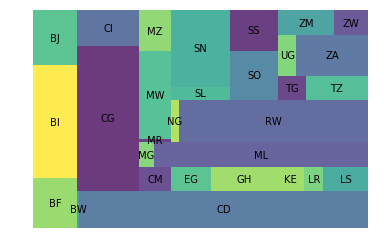

In [38]:


squarify.plot(sizes=piv.values, label=piv.index, alpha=.8 )
plt.axis('off')
plt.show()

In [12]:
import qgrid 
qgrid_widget = qgrid.show_grid(df, show_toolbar=True)
qgrid_widget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [13]:
qgrid_widget.get_changed_df()

,id_number,loan_amount,lender_count,status,funded_date,funded_amount,repayment_term,location_country_code,sector,description,use
0,736066,4825,60,funded,2014-08-03T17:51:50Z,4825,8,BJ,Retail,NaN,NaN
1,743090,975,34,funded,2014-08-18T09:10:54Z,975,12,BJ,Food,NaN,NaN
2,743120,950,25,funded,2014-08-09T17:46:35Z,950,14,BJ,Services,NaN,NaN
3,743121,825,28,funded,2014-08-24T17:00:38Z,825,14,BJ,Retail,NaN,NaN
4,743124,725,21,funded,2014-08-25T03:24:54Z,725,13,BJ,Retail,NaN,NaN
5,743125,725,27,funded,2014-08-18T23:08:00Z,725,13,BJ,Retail,NaN,NaN
6,743130,725,27,funded,2014-08-19T12:14:49Z,725,13,BJ,Retail,NaN,NaN
7,743134,525,14,funded,2014-07-28T06:20:44Z,525,13,BJ,Services,NaN,NaN
8,743207,950,35,funded,2014-08-26T14:24:08Z,950,14,BJ,Retail,NaN,NaN
9,743228,500,10,funded,2014-08-01T01:54:34Z,500,10,BJ,Food,NaN,NaN


In [6]:
print(len(df['borrower_count']))
print(max(df['funded_amount']))
print(df['loan_amount'].mean())

KeyError: 'borrower_count'

In [7]:
df.head()

,id_number,loan_amount,lender_count,status,funded_date,funded_amount,repayment_term,location_country_code,sector,description,use
0,736066,4825,60,funded,2014-08-03T17:51:50Z,4825,8,BJ,Retail,NaN,NaN
1,743090,975,34,funded,2014-08-18T09:10:54Z,975,12,BJ,Food,NaN,NaN
2,743120,950,25,funded,2014-08-09T17:46:35Z,950,14,BJ,Services,NaN,NaN
3,743121,825,28,funded,2014-08-24T17:00:38Z,825,14,BJ,Retail,NaN,NaN
4,743124,725,21,funded,2014-08-25T03:24:54Z,725,13,BJ,Retail,NaN,NaN


In [10]:
df

,id_number,loan_amount,lender_count,status,funded_date,funded_amount,repayment_term,location_country_code,sector,description,use
0,736066,4825,60,funded,2014-08-03T17:51:50Z,4825,8,BJ,Retail,NaN,NaN
1,743090,975,34,funded,2014-08-18T09:10:54Z,975,12,BJ,Food,NaN,NaN
2,743120,950,25,funded,2014-08-09T17:46:35Z,950,14,BJ,Services,NaN,NaN
3,743121,825,28,funded,2014-08-24T17:00:38Z,825,14,BJ,Retail,NaN,NaN
4,743124,725,21,funded,2014-08-25T03:24:54Z,725,13,BJ,Retail,NaN,NaN
5,743125,725,27,funded,2014-08-18T23:08:00Z,725,13,BJ,Retail,NaN,NaN
6,743130,725,27,funded,2014-08-19T12:14:49Z,725,13,BJ,Retail,NaN,NaN
7,743134,525,14,funded,2014-07-28T06:20:44Z,525,13,BJ,Services,NaN,NaN
8,743207,950,35,funded,2014-08-26T14:24:08Z,950,14,BJ,Retail,NaN,NaN
9,743228,500,10,funded,2014-08-01T01:54:34Z,500,10,BJ,Food,NaN,NaN


In [9]:
df['activity'].value_counts()

KeyError: 'activity'

### 3. Selecting Data
To examine a specfic column of the DataFrame:

In [14]:
df['activity'].head()

0      Food Stall
1          Retail
2    Butcher Shop
3            Food
4            Food
Name: activity, dtype: object

In [15]:
df[['activity','basket_amount']].tail()

,activity,basket_amount
5618,Shoe Sales,NaN
5619,Retail,NaN
5620,Livestock,NaN
5621,Retail,NaN
5622,Retail,NaN




To examine specific rows and columns of a Dataframe, Pandas provides
the `iloc` and `loc` methods to do so.  `iloc` is used when you want to specify a list or range of indices, and `.loc` is used when you want to specify a list or range of labels.  

For both of these methods you need to specify two elements, with the first element indicating the rows that you want to select and the second element indicating the columns that you want to select.

In [8]:
# Get rows 1 through 3 and columns 0 through 5.
df.iloc[1:3,:5]

,activity,basket_amount,bonus_credit_eligibility,borrower_count,currency_exchange_loss_amount
1,Furniture Making,0.0,False,1,NaN
2,Home Energy,0.0,False,1,NaN


In [9]:
# Get rows with index values of 2-4 and the columns basket_amount and activity
df.loc[2:4, ["basket_amount", "activity"]]

,basket_amount,activity
2,0.0,Home Energy
3,0.0,Used Clothing
4,0.0,Farming


What do you notice about the way the indices work for `iloc` versus `loc`?

In [10]:
# To see all the rows and columns:
df.iloc[:,:]

,activity,basket_amount,bonus_credit_eligibility,borrower_count,currency_exchange_loss_amount,description.languages,funded_amount,id,image.id,image.template_id,...,posted_date,sector,status,tags,themes,use,video.id,video.thumbnailImageId,video.title,video.youtubeId
0,Farming,0.0,False,1,NaN,['en'],0,1291548,2516002,1,...,2017-05-09T00:40:03Z,Agriculture,fundraising,"[{'name': '#Woman Owned Biz'}, {'name': '#Pare...",NaN,to purchase more tea leaves to sell to the tea...,NaN,NaN,NaN,NaN
1,Furniture Making,0.0,False,1,NaN,['en'],0,1291532,2515992,1,...,2017-05-09T00:30:05Z,Manufacturing,fundraising,[],NaN,to buy timber to make more furniture for his e...,NaN,NaN,NaN,NaN
2,Home Energy,0.0,False,1,NaN,['en'],50,1291530,2515991,1,...,2017-05-09T00:30:04Z,Personal Use,fundraising,"[{'name': '#Eco-friendly'}, {'name': '#Technol...","['Green', 'Earth Day Campaign']",to buy a solar lantern.,NaN,NaN,NaN,NaN
3,Used Clothing,0.0,False,1,NaN,['en'],0,1291525,2515986,1,...,2017-05-09T00:20:04Z,Clothing,fundraising,[{'name': '#Eco-friendly'}],NaN,to buy more clothes to meet the needs and tast...,NaN,NaN,NaN,NaN
4,Farming,0.0,False,1,NaN,['en'],0,1291518,2515975,1,...,2017-05-09T00:20:03Z,Agriculture,fundraising,[{'name': '#Woman Owned Biz'}],['Rural Exclusion'],"to buy farming inputs (fertilizers, pesticides...",NaN,NaN,NaN,NaN
5,Used Clothing,0.0,False,1,NaN,['en'],0,1291513,2515968,1,...,2017-05-09T00:10:04Z,Clothing,fundraising,"[{'name': '#Woman Owned Biz'}, {'name': '#Eco-...",NaN,to buy more bales of clothes to grow her busin...,NaN,NaN,NaN,NaN
6,Farming,25.0,False,1,NaN,['en'],125,1291516,2515972,1,...,2017-05-09T00:10:03Z,Agriculture,fundraising,"[{'name': '#Woman Owned Biz'}, {'name': '#Pare...",['Rural Exclusion'],to buy seeds so that she can begin horticultur...,NaN,NaN,NaN,NaN
7,Pigs,0.0,False,1,NaN,['en'],0,1291490,2515937,1,...,2017-05-08T23:30:09Z,Agriculture,fundraising,[{'name': '#Animals'}],NaN,"to buy pig feeds and logs to burn charcoal, so...",NaN,NaN,NaN,NaN
8,Farming,0.0,False,1,NaN,['en'],0,1291494,2511365,1,...,2017-05-08T23:30:05Z,Agriculture,fundraising,[],NaN,to purchase farm inputs.,NaN,NaN,NaN,NaN
9,Cereals,0.0,False,1,NaN,['en'],0,1291486,2515930,1,...,2017-05-08T23:20:06Z,Food,fundraising,[{'name': '#Woman Owned Biz'}],['Rural Exclusion'],to buy cereals to sell at her local market.,NaN,NaN,NaN,NaN


In [11]:
# You can also store a slice of the dataframe as a new dataframe!
titles_df = df.iloc[:,2]
titles_df.head()

0    False
1    False
2    False
3    False
4    False
Name: bonus_credit_eligibility, dtype: bool

### 4. Select subets of the DataFrame

A powerful feature of DataFrames is that you can view a subset of the DataFrame based on the values of the columns or rows.  For example, lets say you only wanted to view loans with a status of "expired"

In [16]:
df[df['status']=='expired']

,activity,basket_amount,bonus_credit_eligibility,borrower_count,borrowers,currency_exchange_loss_amount,description_languages,description_texts_en,description_texts_es,description_texts_fr,...,terms_repayment_interval,terms_repayment_term,terms_scheduled_payments,themes,translator_byline,translator_image,use,video_id,video_thumbnailImageId,video_title
18,Food,NaN,False,24,"[{'first_name': 'Tharcisse', 'last_name': '', ...",NaN,"['fr', 'en']",Evariste is part of the Mageyo group and lives...,NaN,Evariste fait partie du groupe Mageyo et habi...,...,Monthly,10,[],['Conflict Zones'],leonardo,1277720.0,to increase his capital and purchase a large q...,NaN,NaN,NaN
20,General Store,NaN,False,18,"[{'first_name': 'Emmanuel', 'last_name': '', '...",NaN,"['fr', 'en']",Egide is part of the Yagurukundo group and liv...,NaN,Egide fait partie du groupe Yagurukundo et h...,...,Monthly,9,[],['Conflict Zones'],leonardo,1277720.0,"to increase their capital and buy rice, beans,...",NaN,NaN,NaN
21,Food,NaN,False,26,"[{'first_name': 'Elie', 'last_name': '', 'gend...",NaN,"['fr', 'en']",Isidore is a member of the Butanuka group and ...,NaN,Isidore fait partie du groupe Butanuka et hab...,...,Monthly,9,[],['Conflict Zones'],Katharina S,340594.0,to buy palm oil for resale in order to earn more.,NaN,NaN,NaN
24,Clothing Sales,NaN,False,26,"[{'first_name': 'Aline', 'last_name': '', 'gen...",NaN,"['fr', 'en']",Alexis is part of the Gitwe-Twitezimbere group...,NaN,Alexis fait partie du groupe Gitwe-Twitezimber...,...,Monthly,10,[],['Conflict Zones'],leonardo,1277720.0,to increase his capital and buy clothing to re...,NaN,NaN,NaN
25,Butcher Shop,NaN,False,26,"[{'first_name': 'Spéciose', 'last_name': '', '...",NaN,"['fr', 'en']",Marcien is a member of the group called Gitwe-...,NaN,Marcien fait partie du groupe Gitwe-Twitezimbe...,...,Monthly,10,[],['Conflict Zones'],Teresa Kramer,1940938.0,to grow his working capital and buy a pig to s...,NaN,NaN,NaN
26,Fruits & Vegetables,NaN,False,30,"[{'first_name': 'Jeanine', 'last_name': '', 'g...",NaN,"['fr', 'en']",Laurent is a member of the Twijukire-Ibikorwa ...,NaN,Laurent fait partie du groupe Twijukire-Ibikor...,...,Monthly,10,[],['Conflict Zones'],Katharina S,340594.0,to bolster his capital and buy unripe bananas...,NaN,NaN,NaN
27,Liquor Store / Off-License,NaN,False,23,"[{'first_name': 'Bernadette', 'last_name': '',...",NaN,"['fr', 'en']",Elie belongs to the Kayago Groupe and lives in...,NaN,Elie fait partie du groupe Kayago et habite à...,...,Irregularly,9,[],['Conflict Zones'],Christopher Smith,NaN,to increase their capital and purchase 40 crat...,NaN,NaN,NaN
31,Liquor Store / Off-License,NaN,False,23,"[{'first_name': 'Marie', 'last_name': '', 'gen...",NaN,"['fr', 'en']",Jeanine is part of the Twungubumwe group and l...,NaN,Jeanine fait partie du groupe Twungubumwe et...,...,Monthly,8,[],['Conflict Zones'],Caroline Gagne,1946070.0,to increase her capital in order to buy banana...,NaN,NaN,NaN
37,Food,NaN,False,20,"[{'first_name': 'Josélyne', 'last_name': '', '...",NaN,"['fr', 'en']",Jacques is a member of the Mutumba Business Gr...,NaN,Jacques fait partie du groupe Mutumba Busines...,...,Monthly,8,[],['Conflict Zones'],Micol Werner,NaN,"to buy a bag of sugar, a bag of corn flour and...",NaN,NaN,NaN
40,Fruits & Vegetables,NaN,False,16,"[{'first_name': 'Claver', 'last_name': '', 'ge...",NaN,"['fr', 'en']",Eric is a member of the Turavyiyemeje group an...,NaN,Eric fait partie du groupe Turavyiyemeje et h...,...,Monthly,10,[],['Conflict Zones'],Alistair Assheton,NaN,to increase his working capital and to buy avo...,NaN,NaN,NaN


To view all loans with a status of "expired" `or` "fundraising":

In [17]:
df[(df['status']=='expired')|(df['status']=='fundraising')]

,activity,basket_amount,bonus_credit_eligibility,borrower_count,borrowers,currency_exchange_loss_amount,description_languages,description_texts_en,description_texts_es,description_texts_fr,...,terms_repayment_interval,terms_repayment_term,terms_scheduled_payments,themes,translator_byline,translator_image,use,video_id,video_thumbnailImageId,video_title
18,Food,NaN,False,24,"[{'first_name': 'Tharcisse', 'last_name': '', ...",NaN,"['fr', 'en']",Evariste is part of the Mageyo group and lives...,NaN,Evariste fait partie du groupe Mageyo et habi...,...,Monthly,10,[],['Conflict Zones'],leonardo,1277720.0,to increase his capital and purchase a large q...,NaN,NaN,NaN
20,General Store,NaN,False,18,"[{'first_name': 'Emmanuel', 'last_name': '', '...",NaN,"['fr', 'en']",Egide is part of the Yagurukundo group and liv...,NaN,Egide fait partie du groupe Yagurukundo et h...,...,Monthly,9,[],['Conflict Zones'],leonardo,1277720.0,"to increase their capital and buy rice, beans,...",NaN,NaN,NaN
21,Food,NaN,False,26,"[{'first_name': 'Elie', 'last_name': '', 'gend...",NaN,"['fr', 'en']",Isidore is a member of the Butanuka group and ...,NaN,Isidore fait partie du groupe Butanuka et hab...,...,Monthly,9,[],['Conflict Zones'],Katharina S,340594.0,to buy palm oil for resale in order to earn more.,NaN,NaN,NaN
24,Clothing Sales,NaN,False,26,"[{'first_name': 'Aline', 'last_name': '', 'gen...",NaN,"['fr', 'en']",Alexis is part of the Gitwe-Twitezimbere group...,NaN,Alexis fait partie du groupe Gitwe-Twitezimber...,...,Monthly,10,[],['Conflict Zones'],leonardo,1277720.0,to increase his capital and buy clothing to re...,NaN,NaN,NaN
25,Butcher Shop,NaN,False,26,"[{'first_name': 'Spéciose', 'last_name': '', '...",NaN,"['fr', 'en']",Marcien is a member of the group called Gitwe-...,NaN,Marcien fait partie du groupe Gitwe-Twitezimbe...,...,Monthly,10,[],['Conflict Zones'],Teresa Kramer,1940938.0,to grow his working capital and buy a pig to s...,NaN,NaN,NaN
26,Fruits & Vegetables,NaN,False,30,"[{'first_name': 'Jeanine', 'last_name': '', 'g...",NaN,"['fr', 'en']",Laurent is a member of the Twijukire-Ibikorwa ...,NaN,Laurent fait partie du groupe Twijukire-Ibikor...,...,Monthly,10,[],['Conflict Zones'],Katharina S,340594.0,to bolster his capital and buy unripe bananas...,NaN,NaN,NaN
27,Liquor Store / Off-License,NaN,False,23,"[{'first_name': 'Bernadette', 'last_name': '',...",NaN,"['fr', 'en']",Elie belongs to the Kayago Groupe and lives in...,NaN,Elie fait partie du groupe Kayago et habite à...,...,Irregularly,9,[],['Conflict Zones'],Christopher Smith,NaN,to increase their capital and purchase 40 crat...,NaN,NaN,NaN
31,Liquor Store / Off-License,NaN,False,23,"[{'first_name': 'Marie', 'last_name': '', 'gen...",NaN,"['fr', 'en']",Jeanine is part of the Twungubumwe group and l...,NaN,Jeanine fait partie du groupe Twungubumwe et...,...,Monthly,8,[],['Conflict Zones'],Caroline Gagne,1946070.0,to increase her capital in order to buy banana...,NaN,NaN,NaN
37,Food,NaN,False,20,"[{'first_name': 'Josélyne', 'last_name': '', '...",NaN,"['fr', 'en']",Jacques is a member of the Mutumba Business Gr...,NaN,Jacques fait partie du groupe Mutumba Busines...,...,Monthly,8,[],['Conflict Zones'],Micol Werner,NaN,"to buy a bag of sugar, a bag of corn flour and...",NaN,NaN,NaN
40,Fruits & Vegetables,NaN,False,16,"[{'first_name': 'Claver', 'last_name': '', 'ge...",NaN,"['fr', 'en']",Eric is a member of the Turavyiyemeje group an...,NaN,Eric fait partie du groupe Turavyiyemeje et h...,...,Monthly,10,[],['Conflict Zones'],Alistair Assheton,NaN,to increase his working capital and to buy avo...,NaN,NaN,NaN


Select loans that have expired and with loan amounts greater than 1000

In [18]:
df[(df['status']=='expired')&(df['loan_amount']>1000)]

,activity,basket_amount,bonus_credit_eligibility,borrower_count,borrowers,currency_exchange_loss_amount,description_languages,description_texts_en,description_texts_es,description_texts_fr,...,terms_repayment_interval,terms_repayment_term,terms_scheduled_payments,themes,translator_byline,translator_image,use,video_id,video_thumbnailImageId,video_title
18,Food,NaN,False,24,"[{'first_name': 'Tharcisse', 'last_name': '', ...",NaN,"['fr', 'en']",Evariste is part of the Mageyo group and lives...,NaN,Evariste fait partie du groupe Mageyo et habi...,...,Monthly,10,[],['Conflict Zones'],leonardo,1277720.0,to increase his capital and purchase a large q...,NaN,NaN,NaN
20,General Store,NaN,False,18,"[{'first_name': 'Emmanuel', 'last_name': '', '...",NaN,"['fr', 'en']",Egide is part of the Yagurukundo group and liv...,NaN,Egide fait partie du groupe Yagurukundo et h...,...,Monthly,9,[],['Conflict Zones'],leonardo,1277720.0,"to increase their capital and buy rice, beans,...",NaN,NaN,NaN
21,Food,NaN,False,26,"[{'first_name': 'Elie', 'last_name': '', 'gend...",NaN,"['fr', 'en']",Isidore is a member of the Butanuka group and ...,NaN,Isidore fait partie du groupe Butanuka et hab...,...,Monthly,9,[],['Conflict Zones'],Katharina S,340594.0,to buy palm oil for resale in order to earn more.,NaN,NaN,NaN
24,Clothing Sales,NaN,False,26,"[{'first_name': 'Aline', 'last_name': '', 'gen...",NaN,"['fr', 'en']",Alexis is part of the Gitwe-Twitezimbere group...,NaN,Alexis fait partie du groupe Gitwe-Twitezimber...,...,Monthly,10,[],['Conflict Zones'],leonardo,1277720.0,to increase his capital and buy clothing to re...,NaN,NaN,NaN
25,Butcher Shop,NaN,False,26,"[{'first_name': 'Spéciose', 'last_name': '', '...",NaN,"['fr', 'en']",Marcien is a member of the group called Gitwe-...,NaN,Marcien fait partie du groupe Gitwe-Twitezimbe...,...,Monthly,10,[],['Conflict Zones'],Teresa Kramer,1940938.0,to grow his working capital and buy a pig to s...,NaN,NaN,NaN
26,Fruits & Vegetables,NaN,False,30,"[{'first_name': 'Jeanine', 'last_name': '', 'g...",NaN,"['fr', 'en']",Laurent is a member of the Twijukire-Ibikorwa ...,NaN,Laurent fait partie du groupe Twijukire-Ibikor...,...,Monthly,10,[],['Conflict Zones'],Katharina S,340594.0,to bolster his capital and buy unripe bananas...,NaN,NaN,NaN
27,Liquor Store / Off-License,NaN,False,23,"[{'first_name': 'Bernadette', 'last_name': '',...",NaN,"['fr', 'en']",Elie belongs to the Kayago Groupe and lives in...,NaN,Elie fait partie du groupe Kayago et habite à...,...,Irregularly,9,[],['Conflict Zones'],Christopher Smith,NaN,to increase their capital and purchase 40 crat...,NaN,NaN,NaN
31,Liquor Store / Off-License,NaN,False,23,"[{'first_name': 'Marie', 'last_name': '', 'gen...",NaN,"['fr', 'en']",Jeanine is part of the Twungubumwe group and l...,NaN,Jeanine fait partie du groupe Twungubumwe et...,...,Monthly,8,[],['Conflict Zones'],Caroline Gagne,1946070.0,to increase her capital in order to buy banana...,NaN,NaN,NaN
37,Food,NaN,False,20,"[{'first_name': 'Josélyne', 'last_name': '', '...",NaN,"['fr', 'en']",Jacques is a member of the Mutumba Business Gr...,NaN,Jacques fait partie du groupe Mutumba Busines...,...,Monthly,8,[],['Conflict Zones'],Micol Werner,NaN,"to buy a bag of sugar, a bag of corn flour and...",NaN,NaN,NaN
40,Fruits & Vegetables,NaN,False,16,"[{'first_name': 'Claver', 'last_name': '', 'ge...",NaN,"['fr', 'en']",Eric is a member of the Turavyiyemeje group an...,NaN,Eric fait partie du groupe Turavyiyemeje et h...,...,Monthly,10,[],['Conflict Zones'],Alistair Assheton,NaN,to increase his working capital and to buy avo...,NaN,NaN,NaN


### 5. Merging and grouping data

You can group data by a column that has duplicates, like activity for the sector group.

In [24]:
df.groupby(['activity'])['loan_amount'].sum().reset_index()

,activity,loan_amount
0,Agriculture,273925
1,Animal Sales,380475
2,Arts,1450
3,Auto Repair,1425
4,Bakery,65300
5,Balut-Making,250
6,Barber Shop,22000
7,Beauty Salon,51950
8,Beverages,146625
9,Bicycle Repair,1425


You can also use SQL functions like inner join, outer join, left / right join using pd.merge(). Find documentation on this concept here: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html

## Great Resources for further information:

- [10 minute introduction to pandas](http://pandas.pydata.org/pandas-docs/stable/10min.html)
- [Pandas in ipython notebooks](http://nbviewer.jupyter.org/github/jvns/pandas-cookbook/blob/master/cookbook/A%20quick%20tour%20of%20IPython%20Notebook.ipynb)

In [15]:
!ls 

Intro to Pandas.ipynb intro_to_python.ipynb
data.csv              loan_details.csv


In [ ]:
!pip install "name of the library missing"